In [96]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.naive_bayes import GaussianNB  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics

In [23]:
data1 = pd.read_csv('C:/Users/prati/ElectricCarData_Norm.csv')
data1.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [24]:
data1.shape




(103, 14)

In [25]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [26]:
data1.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


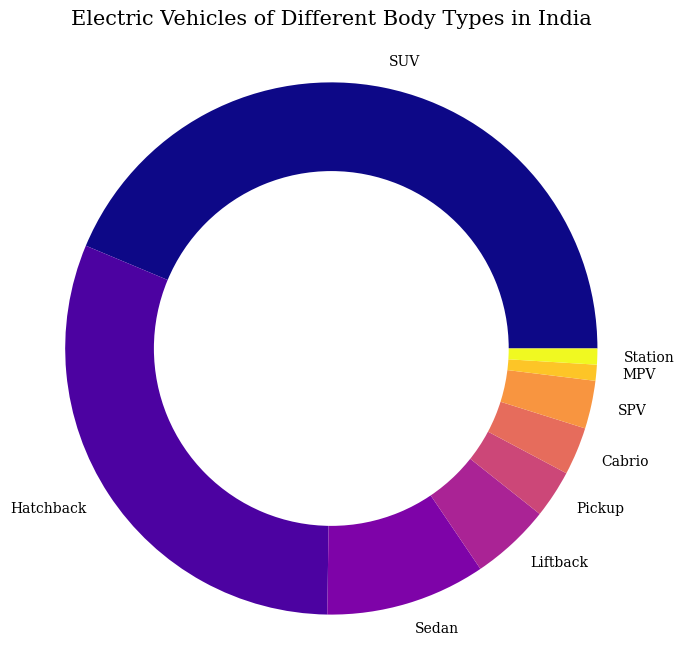

In [27]:
# different body types EVs visualization from dataset 1

x = data1['BodyStyle'].value_counts().plot.pie(radius=1.8, cmap='plasma', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

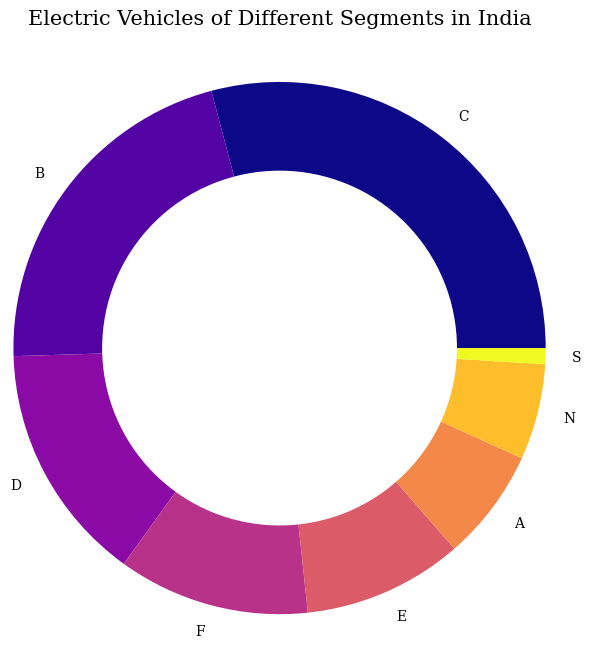

In [28]:
# analysis of different segments of EVs from dataset 1
x = data1['Segment'].value_counts().plot.pie(radius=1.8, cmap='plasma', startangle=0, textprops=dict(family='serif'), pctdistance=.5)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Segments in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

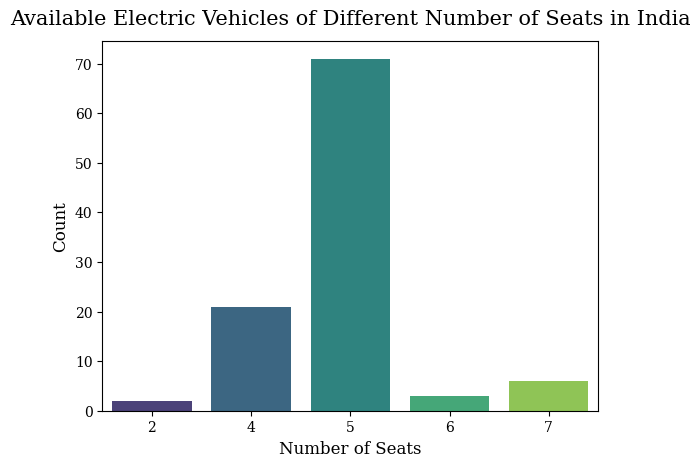

In [29]:
# EVs of different number of seats from dataset 1
sns.countplot(data=data1, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()

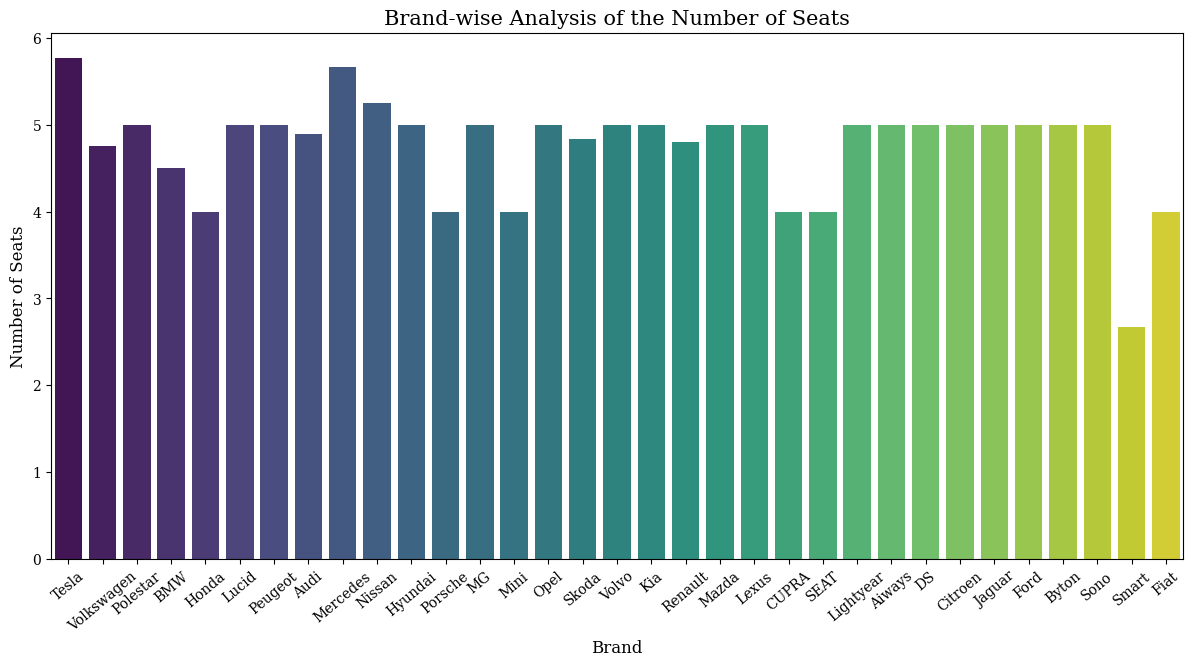

In [30]:
# brand-wise analysis of the number of seats
sns.catplot(kind='bar', data=data1, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15);

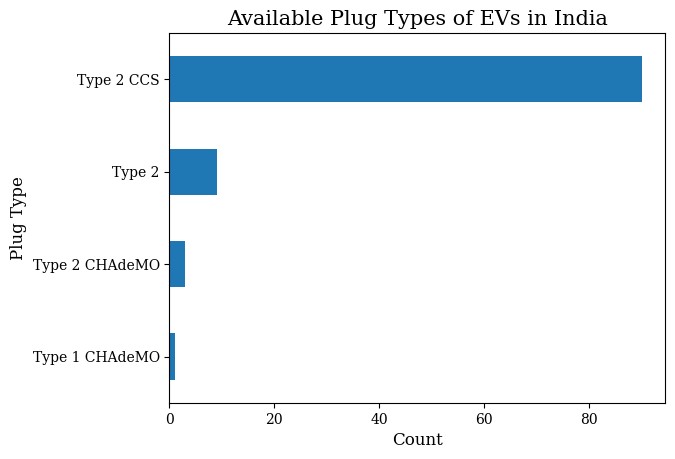

In [31]:
# plug types visualization from dataset 1
data1['PlugType'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Plug Types of EVs in India', family='serif', size=15)
plt.show()
     

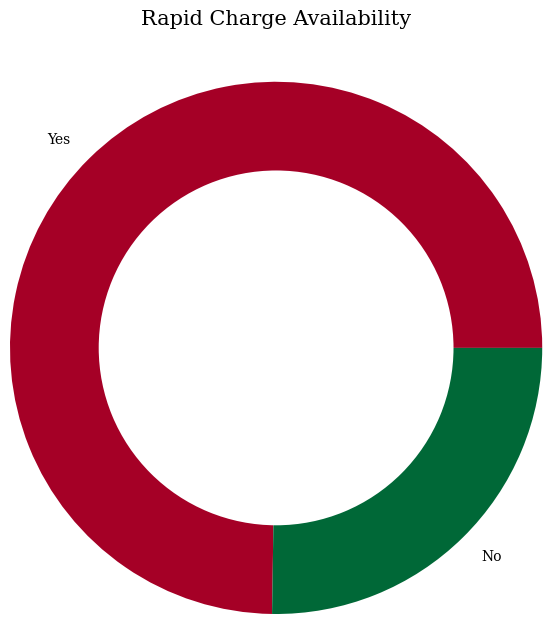

In [32]:
x = data1['RapidCharge'].value_counts().plot.pie(radius=1.8, cmap='RdYlGn', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Rapid Charge Availability', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

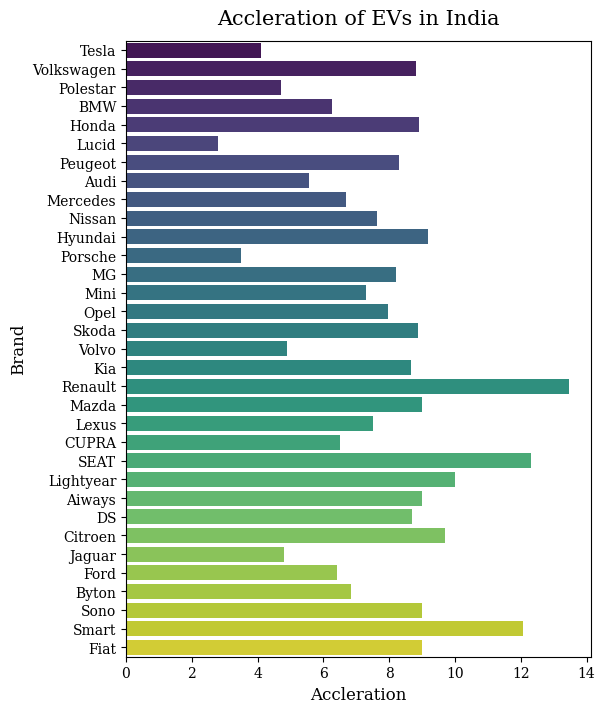

In [33]:
# accleration visualization from dataset 1

plt.figure(figsize=(6, 8)) 
sns.barplot(data=data1, y='Brand', x='AccelSec', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Accleration', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Accleration of EVs in India', family='serif', size=15, pad=12)
plt.show()

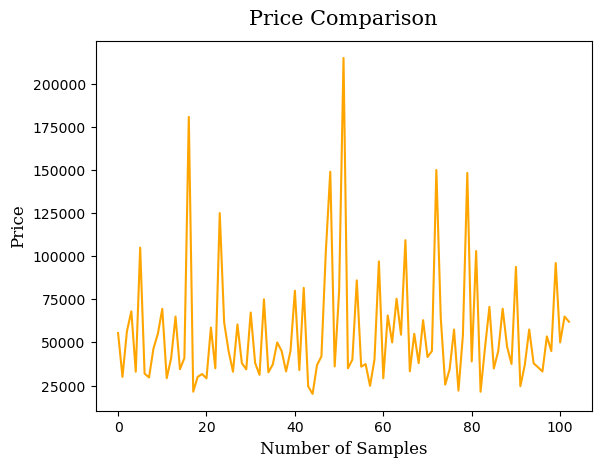

In [34]:
# plotting the price from dataset 1

plt.plot(data1['PriceEuro'], color='orange')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12);
     

In [35]:
#Speed comparison of cars 

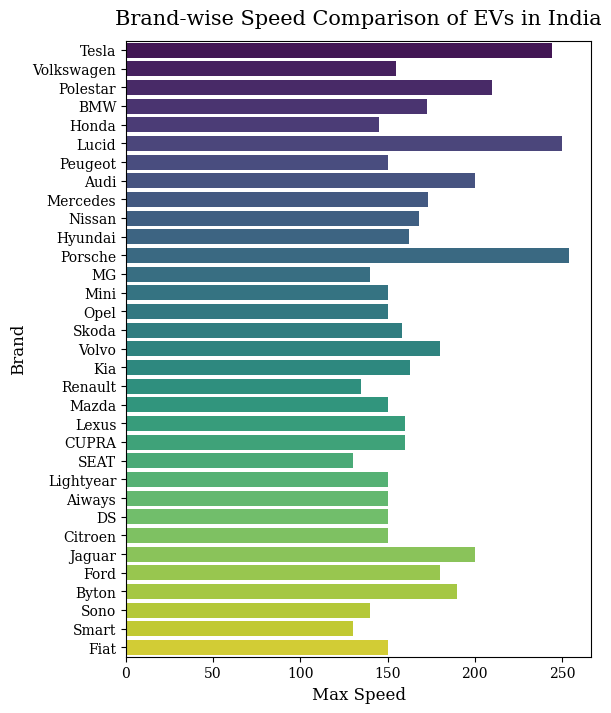

In [36]:
# speed visualization from dataset 1

plt.figure(figsize=(6, 8))
sns.barplot(data=data1, x='TopSpeed_KmH', y='Brand', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Max Speed', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Brand-wise Speed Comparison of EVs in India', family='serif', size=15, pad=12)
plt.show()
     

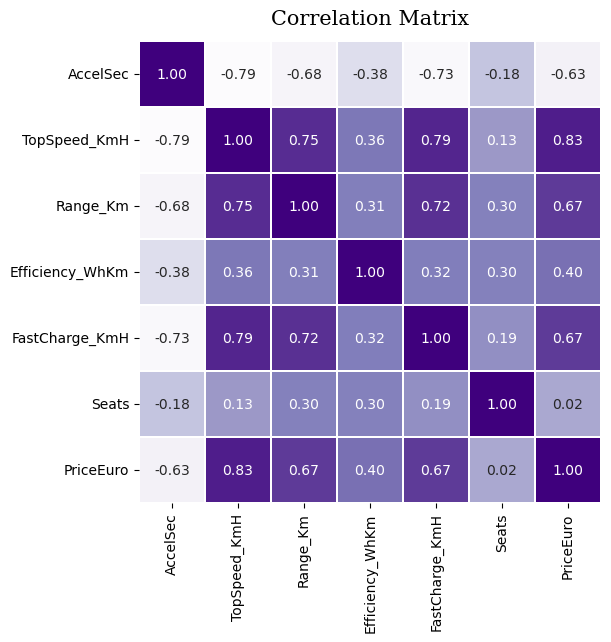

In [37]:
# plotting the correlation matrix from dataset 1

plt.figure(figsize=(6,6))
sns.heatmap(data=data1.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

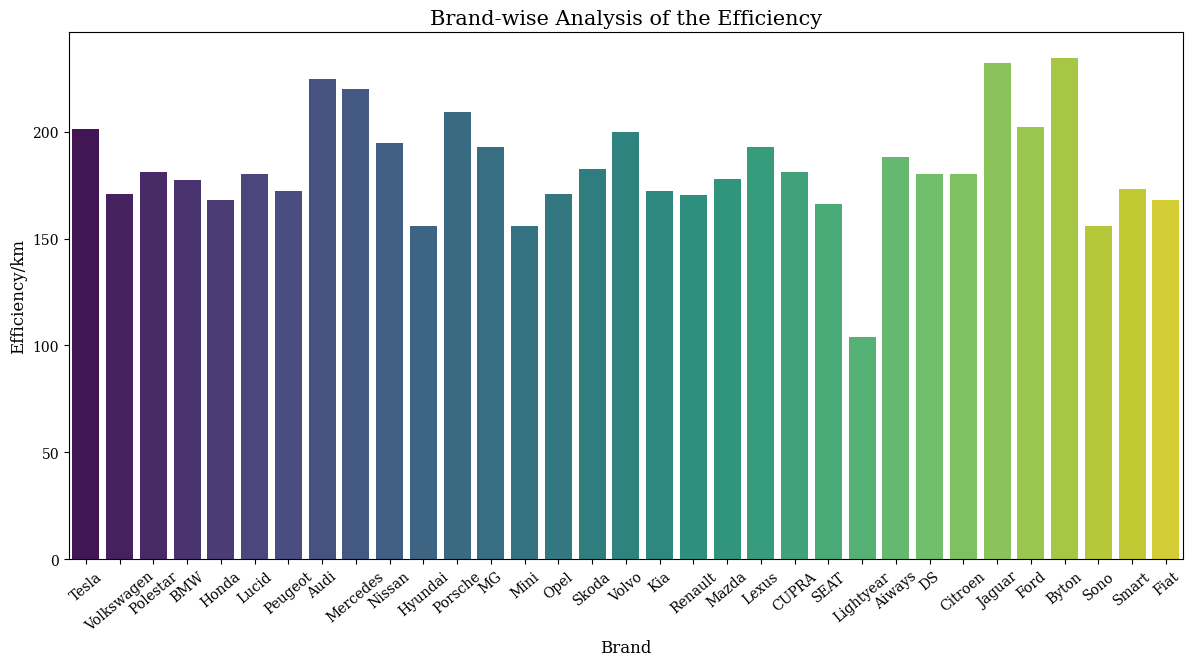

In [38]:
# speed visualization from dataset 1

sns.catplot(kind='bar', data=data1, x='Brand', y='Efficiency_WhKm', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Efficiency/km', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Efficiency', family='serif', size=15);
     

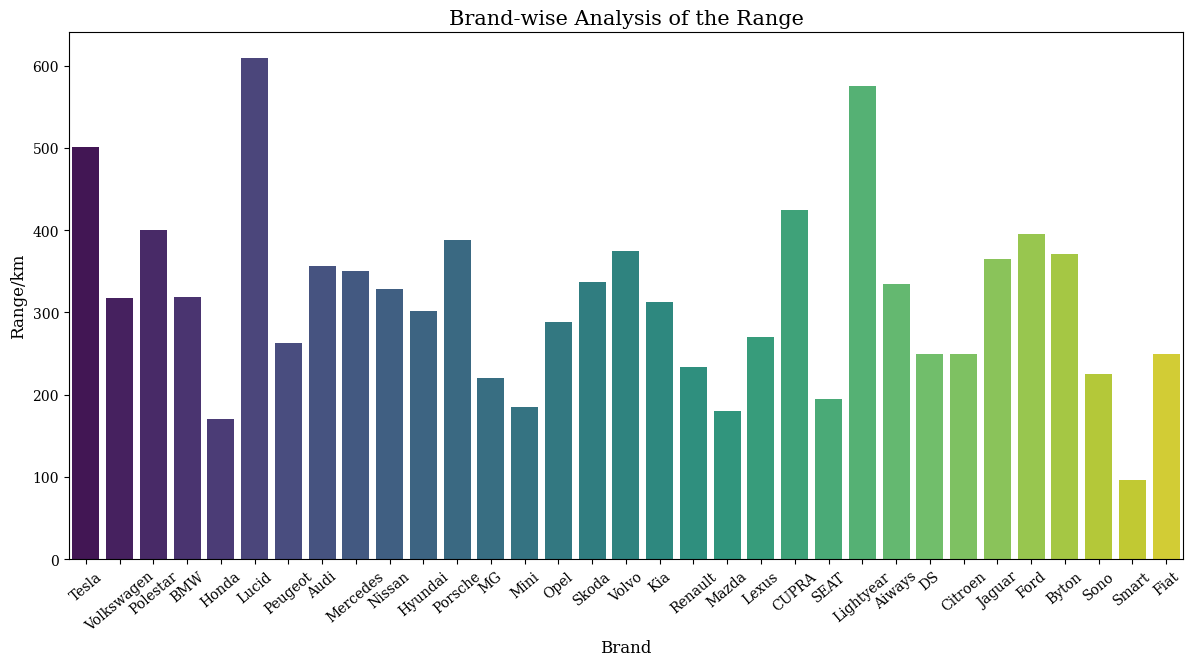

In [39]:
sns.catplot(kind='bar', data=data1, x='Brand', y='Range_Km', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Range/km', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Range', family='serif', size=15);

In [107]:
from sklearn import preprocessing

data1 = data1.replace('-', 0) 
data1 = data1.dropna()
DF_x=data1.iloc[:, 2:14]
X = data1[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

enc = preprocessing.LabelEncoder()
data1['PowerTrain'] = enc.fit_transform(data1['PowerTrain'])
data1['RapidCharge'] = enc.fit_transform(data1['RapidCharge'])
data1['PlugType'] = enc.fit_transform(data1['PlugType'])
data1['BodyStyle'] = enc.fit_transform(data1['BodyStyle'])
data1['Segment'] = enc.fit_transform(data1['Segment'])



In [108]:
data1.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,46,11,18,42,5,50,1,0,2,7,3,2,55480
1,31,33,46,9,15,9,7,0,2,2,1,2,2,30000
2,23,0,12,15,35,21,36,1,0,2,2,3,2,56440
3,2,101,26,12,28,32,32,1,2,2,6,3,2,68040
4,9,78,41,5,4,10,1,1,2,2,1,1,1,32997


In [73]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.447199,-0.295646,-1.316080,1.271677,1.340835,-0.491655,0.482208,0.603911,-0.075293
1,-2.526028,-0.254381,0.982127,1.156273,0.222727,0.384962,-0.651077,-0.225054,-0.516744
2,1.935992,0.063586,-0.598091,0.167445,0.641761,-0.634456,0.305786,0.227623,0.133120
3,0.540299,-0.009441,-0.289839,0.755273,-1.666765,0.170814,-0.301138,0.338925,0.013730
4,-2.955083,-0.675059,-1.022690,-0.525436,-0.710831,-0.127949,-0.580509,-0.136677,0.022693


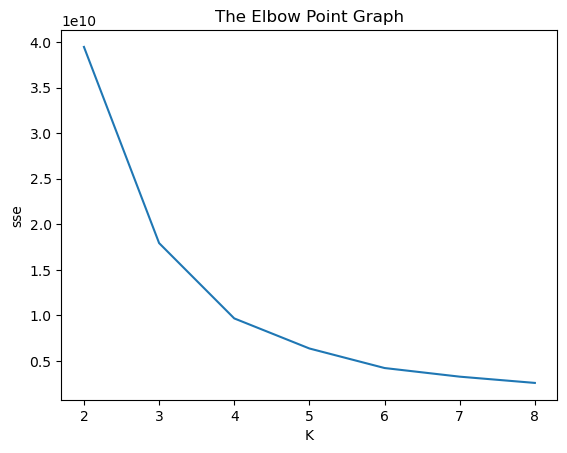

In [69]:
k_range = range(2,9)
#sum of squared error
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
plt.title('The Elbow Point Graph')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range,sse)

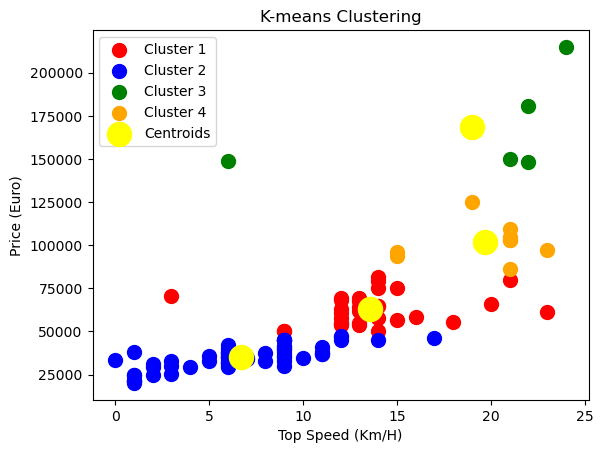

In [117]:
clus = df.loc[:,["TopSpeed_KmH","PriceEuro"]].values
kmeans = KMeans(n_clusters=4, init='k-means++')
Y = kmeans.fit_predict(clus)
plt.scatter(clus[Y == 0, 0], clus[Y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(clus[Y == 1, 0], clus[Y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(clus[Y == 2, 0], clus[Y == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(clus[Y == 3, 0], clus[Y == 3, 1], s=100, c='orange', label='Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.xlabel('Top Speed (Km/H)')
plt.ylabel('Price (Euro)')
plt.title('K-means Clustering')
plt.legend()

plt.show()

# As the Top speed increases the Price Of The car Also Increases



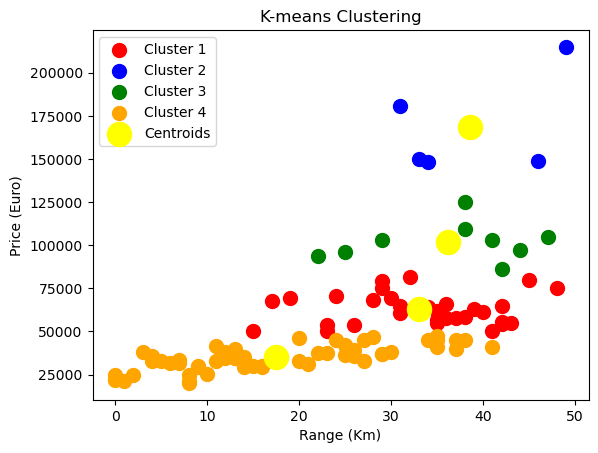

In [118]:
clus = df.loc[:,["Range_Km","PriceEuro"]].values
kmeans = KMeans(n_clusters=4, init='k-means++')
Y = kmeans.fit_predict(clus)
plt.scatter(clus[Y == 0, 0], clus[Y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(clus[Y == 1, 0], clus[Y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(clus[Y == 2, 0], clus[Y == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(clus[Y == 3, 0], clus[Y == 3, 1], s=100, c='orange', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.xlabel('Range (Km)')
plt.ylabel('Price (Euro)')
plt.title('K-means Clustering')
plt.legend()

plt.show()

# Also more is the range of the car so is the price of car

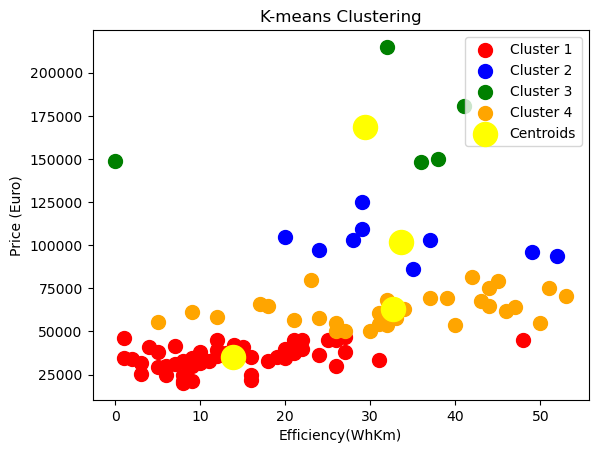

In [119]:
clus = df.loc[:,["Efficiency_WhKm","PriceEuro"]].values
kmeans = KMeans(n_clusters=4, init='k-means++')
Y = kmeans.fit_predict(clus)
plt.scatter(clus[Y == 0, 0], clus[Y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(clus[Y == 1, 0], clus[Y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(clus[Y == 2, 0], clus[Y == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(clus[Y == 3, 0], clus[Y == 3, 1], s=100, c='orange', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.xlabel('Efficiency(WhKm)')
plt.ylabel('Price (Euro)')
plt.title('K-means Clustering')
plt.legend()

plt.show()

# With increase in the efficiency the price of the car also increases

C:\Users\prati\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:906: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Users\prati\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:908: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


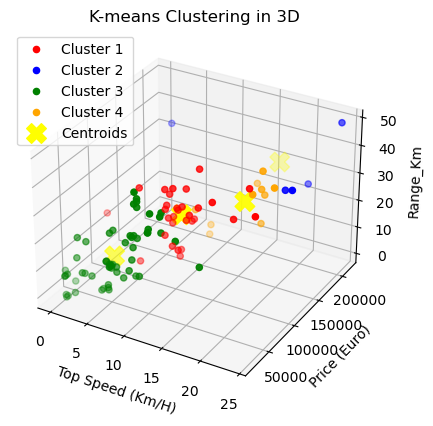

In [121]:
clus = df.loc[:, ["TopSpeed_KmH", "PriceEuro", "Range_Km","Efficiency_WhKm"]].values

kmeans = KMeans(n_clusters=4, init='k-means++')
Y = kmeans.fit_predict(clus)

centroids = kmeans.cluster_centers_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(clus[Y == 0, 0], clus[Y == 0, 1], clus[Y == 0, 2], c='red', label='Cluster 1')
ax.scatter(clus[Y == 1, 0], clus[Y == 1, 1], clus[Y == 1, 2], c='blue', label='Cluster 2')
ax.scatter(clus[Y == 2, 0], clus[Y == 2, 1], clus[Y == 2, 2], c='green', label='Cluster 3')
ax.scatter(clus[Y == 3, 0], clus[Y == 3, 1], clus[Y == 3, 2], c='orange', label='Cluster 4')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],centroids[:, 3], c='yellow', marker='X', s=200, label='Centroids')

ax.set_xlabel('Top Speed (Km/H)')
ax.set_ylabel('Price (Euro)')
ax.set_zlabel('Range_Km')

ax.set_title('K-means Clustering in 3D')
ax.legend()

plt.show()

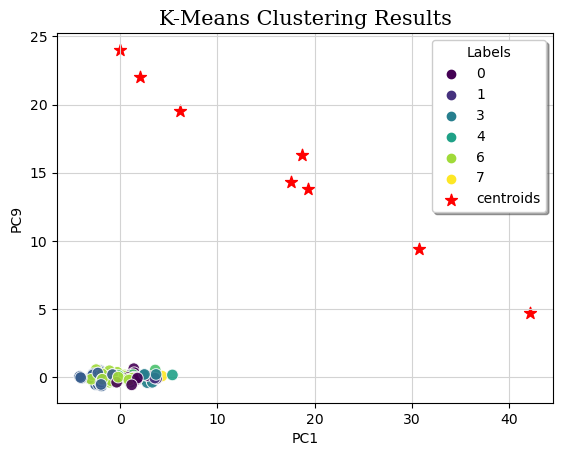

In [113]:
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:, 0], y=kmean.cluster_centers_[:, 1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC9')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='-', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

In [84]:
# Feature selection for performance data
X_performance = data1[['Range_Km', 'AccelSec', 'TopSpeed_KmH', 'FastCharge_KmH']]
y_performance = data1['Efficiency_WhKm']

# Split the performance data into training and testing sets
X_performance_train, X_performance_test, y_performance_train, y_performance_test = train_test_split(X_performance, y_performance, test_size=0.2, random_state=42)

In [88]:
linear = LinearRegression()
linear.fit(X_performance_train, y_performance_train)

LinearRegression()

In [90]:
y_performance_pred_linear = linear.predict(X_performance_test)
performance_mse_linear = mean_squared_error(y_performance_test, y_performance_pred_linear)
print("MSE SCORE : ",performance_mse_linear)

MSE SCORE :  213.11042100338832


In [92]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_performance_train, y_performance_train)

y_performance_pred_dt = decision_tree.predict(X_performance_test)
performance_mse_dt = mean_squared_error(y_performance_test, y_performance_pred_dt)
print('Decision Tree Model MSE:', performance_mse_dt)

Decision Tree Model MSE: 164.0


In [95]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_performance_train, y_performance_train)

y_pred_rf = random_forest.predict(X_performance_test)
performance_mse_rf = mean_squared_error(y_performance_test, y_pred_rf)
print('Random Forest Model MSE:', performance_mse_rf)

Random Forest Model MSE: 198.58134761904762


In [97]:
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC()
dt_clf=DecisionTreeClassifier()
nb_clf=GaussianNB()

  
# making predictions on the training set
for clf in (rfc, knn, svc,dt_clf,nb_clf):
    clf.fit(X_performance_train, y_performance_train)
    y_pred = clf.predict(X_performance_train)
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(y_performance_train, y_pred))

Accuracy score of  RandomForestClassifier = 100.0
Accuracy score of  KNeighborsClassifier = 29.268292682926827
Accuracy score of  SVC = 18.29268292682927
Accuracy score of  DecisionTreeClassifier = 100.0
Accuracy score of  GaussianNB = 60.97560975609756


C:\Users\prati\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [105]:
for clf in (rfc, knn, svc,dt_clf,nb_clf):
    clf.fit(X_performance_train, y_performance_train)
    y_pred = clf.predict(X_performance_test)


C:\Users\prati\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [106]:
y_pred

array([ 1, 32, 21, 32, 12, 32, 12, 15, 12, 32,  3, 26, 26, 10, 26, 10, 32,
       32, 15, 21, 12], dtype=int64)

In [104]:
print(confusion_matrix(y_performance_test, y_pred))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [103]:
print(classification_report(y_performance_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.50      1.00      0.67         1
          21       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         0
          36       0.00    

C:\Users\prati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prati\anaconda3\lib\site-packages\sklearn\metrics\_cla